# Quality Control and ASV table construction with DADA2

## Setup and settings

In [1]:
# Importing packages
import os
import yaml
from qiime2 import Artifact
from qiime2 import Visualization
from qiime2 import Metadata
import qiime2.plugins.dada2.actions as dada2_actions
import qiime2.plugins.metadata.actions as metadata_actions

import matplotlib.pyplot as plt

from utils import *

%matplotlib inline

### Receiving the parameters

The following cell can receive parameters using the [papermill](https://papermill.readthedocs.io/en/latest/) tool.

In [2]:
experiment_name = 'ana-flavia-superlactacao'
base_dir = os.path.join('/', 'home', 'lauro', 'nupeb', 'redemicro')
metadata_file = os.path.join(base_dir, 'data', 'raw', 'metadata', 'sample-metadata.tsv')
replace_files = False
phred = 20
trunc_f = 0
trunc_r = 0
overlap = 12
threads = 6

In [3]:
# Parameters
experiment_name = "ana-flavia-HSD-NCxHSD-NR"
base_dir = "/home/lauro/nupeb/rede-micro/redemicro-ana-flavia-nutri"
manifest_file = "/home/lauro/nupeb/rede-micro/redemicro-ana-flavia-nutri/data/raw/manifest/manifest-ana-flavia-HSD-NCxHSD-NR.csv"
metadata_file = "/home/lauro/nupeb/rede-micro/redemicro-ana-flavia-nutri/data/raw/metadata/metadata-ana-flavia-HSD-NCxHSD-NR.tsv"
class_col = "sample-group"
classifier_file = "/home/lauro/nupeb/dados_brutos_rede_genoma/16S_classifiers_qiime2/silva-138-99-nb-classifier.qza"
replace_files = False
phred = 20
trunc_f = 0
trunc_r = 0
overlap = 12
threads = 6


In [4]:
# Setting hardcoded parameters for development and debbuging
production = True
if not production:
    params_path = os.path.join('..', 'params', 'ana-flavia-superlactacao.yaml')
    with open(params_path, 'r') as stream:
        params = yaml.safe_load(stream)
        experiment_name = params['experiment_name']
        base_dir = params['base_dir']
        replace_files = params['replace_files']
        experiment_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'experiments', 'thayane-feces-01'))
        img_folder = os.path.abspath(os.path.join(experiment_folder, 'imgs'))
        replace_files = False
        phred = 20
        trunc_f = 0
        trunc_r = 0
        overlap = 12
        threads = 6

In [5]:
experiment_folder = os.path.abspath(os.path.join(base_dir, 'experiments', experiment_name))
img_folder = os.path.abspath(os.path.join(experiment_folder, 'imgs'))

### Defining names and paths

In [6]:
qiime_folder = os.path.join(experiment_folder, 'qiime-artifacts')

demux_file = os.path.join(qiime_folder, 'demux-paired.qza')

dada2_tabs = os.path.join(qiime_folder, 'dada2-tabs.qza')
dada2_reps = os.path.join(qiime_folder, 'dada2-reps.qza')
dada2_stat = os.path.join(qiime_folder, 'dada2-stat.qza')

dada2_tabs_view = dada2_tabs[:-1] + 'v'
dada2_reps_view = dada2_reps[:-1] + 'v'
dada2_stat_view = dada2_stat[:-1] + 'v'

## Step execution

### Load input files

This Step import the QIIME2 `SampleData[PairedEndSequencesWithQuality]` Artifact with all demultiplexed sequences and the `Metadata` file.

In [7]:
need_dada2 = not (os.path.isfile(dada2_tabs) and os.path.isfile(dada2_reps) and os.path.isfile(dada2_stat)) or replace_files
need_view = not (os.path.isfile(dada2_tabs_view) and os.path.isfile(dada2_reps_view) and os.path.isfile(dada2_stat_view)) or replace_files

In [8]:
if need_dada2:
    demux = Artifact.load(demux_file)

In [9]:
metadata = Metadata.load(metadata_file)

### Execute DADA2 plugin and create Artifacts

The DADA2 plugin perform tha quality control and create the ASV table. It will be produced three Artifacts:

- tabs (`FeatureTable[Frequency]`) : 
    The resulting feature table.
- reps (`FeatureData[Sequence]`) :
    The resulting feature sequences. Each feature in the feature table will
    be represented by exactly one sequence, and these sequences will be the
    joined paired-end sequences.
- denoising_stats (`SampleData[DADA2Stats]`) : the resulting stats. Shows the number and the proportion of filtered reads in each phase of the plugin execution.

In [10]:
# If some of the DADA2 outputs artifacts do not exist or if the old files will be replaced
if need_dada2:
    
    # Excute the DADA2 plugin
    tabs, reps, stat = dada2_actions.denoise_paired(
        demultiplexed_seqs=demux,
        trunc_q = phred,
        min_overlap = overlap,
        n_threads = threads,
        trunc_len_f = trunc_f,
        trunc_len_r = trunc_r,
    )
    
    # Save the artifacts objects
    tabs.save(dada2_tabs)
    reps.save(dada2_reps)
    stat.save(dada2_stat)

else:
    tabs = Artifact.load(dada2_tabs)
    reps = Artifact.load(dada2_reps)
    stat = Artifact.load(dada2_stat)

Running external command line application(s). This may print messages to stdout and/or stderr.
The command(s) being run are below. These commands cannot be manually re-run as they will depend on temporary files that no longer exist.

Command: run_dada_paired.R /tmp/tmpy73sljdw/forward /tmp/tmpy73sljdw/reverse /tmp/tmpy73sljdw/output.tsv.biom /tmp/tmpy73sljdw/track.tsv /tmp/tmpy73sljdw/filt_f /tmp/tmpy73sljdw/filt_r 0 0 0 0 2.0 2.0 20 12 independent consensus 1.0 6 1000000



R version 4.1.2 (2021-11-01) 


Loading required package: Rcpp


DADA2: 1.22.0 / Rcpp: 1.0.8.2 / RcppParallel: 5.1.5 
1) Filtering 

...............
2) Learning Error Rates


247363108 total bases in 979178 reads from 15 samples will be used for learning the error rates.


169335182 total bases in 979178 reads from 15 samples will be used for learning the error rates.


3) Denoise samples 

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


.

.

.

.

.

.

.

.

.

.

.

.

.

..
4) Remove chimeras (method = consensus)


6) Write output


### Define Visualizations Artifacts

In [11]:
# If some of the DADA2 Visualization artifacts do not exist or if the old files will be replaced
if need_view:
    
    tabs_view, = metadata_actions.tabulate(input=tabs.view(Metadata))
    reps_view, = metadata_actions.tabulate(input=reps.view(Metadata))
    stat_view, = metadata_actions.tabulate(input=stat.view(Metadata))
    
    # Save the artifacts objects
    tabs_view.save(dada2_tabs_view)
    reps_view.save(dada2_reps_view)
    stat_view.save(dada2_stat_view)

else:
    tabs_view = Visualization.load(dada2_tabs_view)
    reps_view = Visualization.load(dada2_reps_view)
    stat_view = Visualization.load(dada2_stat_view)

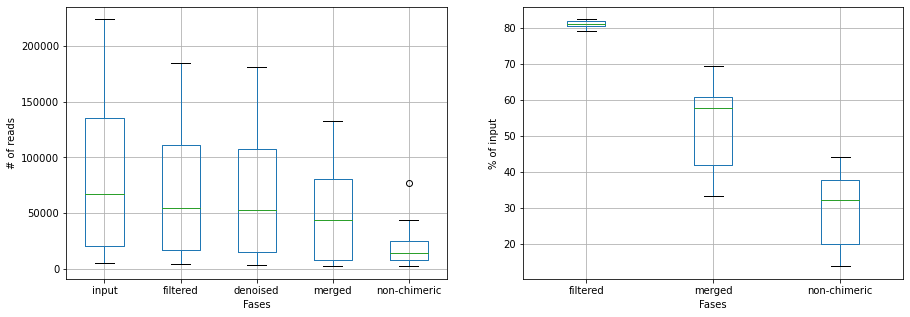

In [12]:
plot_stats_box(stat, os.path.join(img_folder, 'step02-stats-boxplot.pdf'))

In [13]:
percent_head = ['percentage of input passed filter', 'percentage of input merged', 'percentage of input non-chimeric']
stat.view(Metadata).to_dataframe().describe()[percent_head]

,percentage of input passed filter,percentage of input merged,percentage of input non-chimeric
count,15.000000,15.000000,15.000000
mean,81.055333,53.483333,30.023333
std,0.928000,11.751821,10.326184
min,79.120000,33.280000,13.710000
25%,80.535000,41.925000,20.065000
50%,81.030000,57.810000,32.230000
75%,81.760000,60.895000,37.630000
max,82.330000,69.400000,44.160000


In [14]:
stat_view

<visualization: Visualization uuid: 20234ac7-96a5-4aff-b5fa-315442999e61>

In [15]:
# new_stat = Artifact.load('/home/lauro/nupeb/redemicro/experiments/thayane-feces-01/qiime-artifacts/dada2-stat.qza')
# # new_view, = metadata_actions.tabulate(input=new_stat.view(Metadata))
# # plot_stats_box(old_stat)

# old_stat = Artifact.load('/home/lauro/nupeb/dados_brutos_rede_genoma/experiments/fezes-phred_20-tf_0-tr_0-lap_4/fezes_dada2_stat.qza')
# # old_view, = metadata_actions.tabulate(input=old_stat.view(Metadata))
# # plot_stats_box(old_stat)

# plot_stats_box_pairs(old_stat, new_stat)